In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
df=pd.read_csv("rainfall_soil_dataset.csv")
df

/var/folders/dm/y9gb87h50r92ywnr3t0yxkhc0000gn/T/ipykernel_21053/1673642628.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


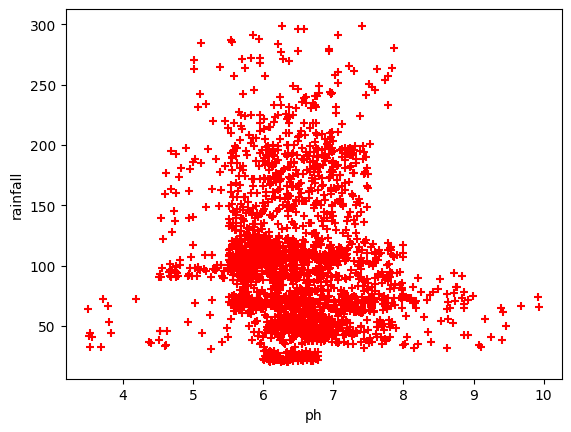

In [2]:
%matplotlib inline
plt.xlabel('ph')
plt.ylabel('rainfall')
plt.scatter(df.ph,df.rainfall,color='red',marker='+')

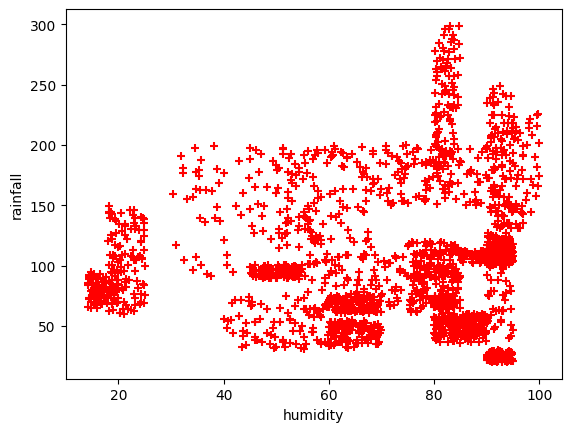

In [3]:
%matplotlib inline
plt.xlabel('humidity')
plt.ylabel('rainfall')
plt.scatter(df.humidity,df.rainfall,color='red',marker='+')

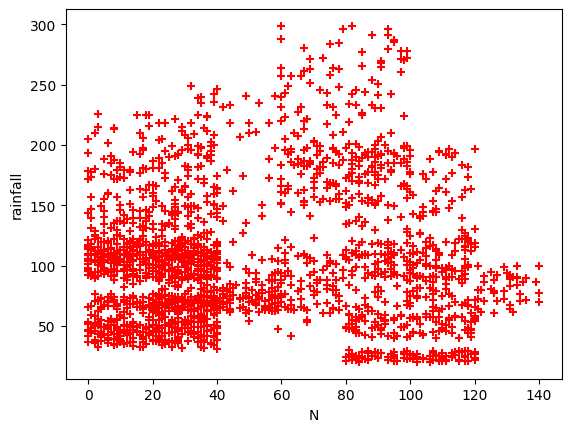

In [4]:
%matplotlib inline
plt.xlabel('N')
plt.ylabel('rainfall')
plt.scatter(df.N,df.rainfall,color='red',marker='+')

In [5]:
reg= linear_model.LinearRegression()
reg.fit(df[['humidity','ph']],df.rainfall)

LinearRegression()

In [6]:
reg.predict([[82.002744,6.502985]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([105.63445641])

In [7]:
reg.coef_

array([ 0.23081681, -7.68885216])

In [8]:
reg.intercept_

136.70733527174013

In [9]:
import math
mdb=math.floor(df.rainfall.median())
mdb

94

In [10]:
df.rainfall=df.rainfall.fillna(mdb)
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
X=df[['humidity','ph']]
X

,humidity,ph
0,82.002744,6.502985
1,80.319644,7.038096
2,82.320763,7.840207
3,80.158363,6.980401
4,81.604873,7.628473
...,...,...
2195,66.413269,6.780064
2196,56.636362,6.086922
2197,67.225123,6.362608
2198,52.127394,6.758793


In [12]:
y=df['rainfall']
y=y.round()
x=X.round()
x

,humidity,ph
0,82.0,7.0
1,80.0,7.0
2,82.0,8.0
3,80.0,7.0
4,82.0,8.0
...,...,...
2195,66.0,7.0
2196,57.0,6.0
2197,67.0,6.0
2198,52.0,7.0


In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [14]:
reg.predict([[82.002744,6.502985]])
m=x.values

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.model_selection import train_test_split
#m=x.values
X_train, X_test, y_train , y_test = train_test_split(x,y,test_size=0.2)




In [16]:
len(X_train)


1760

In [17]:
len(X_test)

440

In [18]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [19]:
clf.predict(X_test)

array([ 96.45344086, 103.11716005, 108.16471541, 103.81860417,
       111.14585294,  97.15488499, 107.81399334,  98.55777324,
       108.16471541, 108.47752293,  90.4911658 , 101.36354973,
       103.29252108,  83.37719261, 108.65288396,  97.11697044,
        99.60993942, 107.81399334, 111.14585294, 108.16471541,
       108.34007644,  99.43457839, 108.3021619 ,  84.21608322,
       105.70966097, 107.81399334, 103.81860417, 103.29252108,
       101.88963283, 102.06499386, 114.08907592, 109.91832572,
       102.90388447,  98.03169014, 109.74296469, 103.46788211,
       103.25460653,  99.08385633, 107.63863231, 108.16471541,
       110.26904778,  97.0174385 , 110.44440881, 107.63863231,
       109.74296469, 107.7760788 , 107.46327128, 108.34007644,
       106.93718819, 103.11716005, 102.76643798,  89.96508271,
       108.16471541, 105.18357788, 104.65749478, 103.46788211,
       107.11254922, 109.91832572,  97.46769251, 107.11254922,
        93.82302539, 102.37780138, 109.91832572, 110.26

In [20]:
y_test

2176    136.0
2025    197.0
1037    112.0
1676    108.0
1804    182.0
        ...  
2114    149.0
1419     29.0
1946     90.0
1048    109.0
933     111.0
Name: rainfall, Length: 440, dtype: float64

In [21]:
clf.score(X_test,y_test)

0.02813929629123746

In [22]:
X

,humidity,ph
0,82.002744,6.502985
1,80.319644,7.038096
2,82.320763,7.840207
3,80.158363,6.980401
4,81.604873,7.628473
...,...,...
2195,66.413269,6.780064
2196,56.636362,6.086922
2197,67.225123,6.362608
2198,52.127394,6.758793


In [23]:
from sklearn.preprocessing import LabelEncoder


le_humidity= LabelEncoder()
le_ph = LabelEncoder()

x['humidity'] = le_humidity.fit_transform(X['humidity'])
x['ph'] = le_ph.fit_transform(X['ph'])

x.head()


,humidity,ph
0,1234,1211
1,1085,1753
2,1262,2117
3,1067,1710
4,1201,2055


In [24]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [25]:

model.fit(x,y)

DecisionTreeClassifier()

In [26]:
model.score(x,y)

1.0

In [27]:
model.predict([[82.320763,7.840207]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([108.])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [29]:
model.score(X_test, y_test)

0.01818181818181818

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test)

In [32]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.020454545454545454


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gbr.predict(X_test)
y_pred


array([ 93.12997735,  75.38619475, 123.48700364,  87.55205386,
       113.08733311, 122.8453613 ,  93.12997735, 116.50134654,
        78.13217352,  79.05929088,  68.07845341,  98.77134067,
        78.27063642, 125.38332105, 159.84876542, 113.9144752 ,
       112.67542972, 118.21760789,  85.00621914,  98.44061305,
       115.74912344,  94.62452628, 104.72372094,  88.57274215,
        95.67785259, 100.08414425,  89.41145522,  87.55205386,
        78.88138498, 112.08571559, 113.08238355, 108.64799653,
       108.69264908,  89.48105189, 135.81216773,  81.16635801,
        71.11044828,  85.12737789,  93.11200558, 104.11660123,
       123.48700364, 110.51802473,  68.07845341, 103.78626335,
       125.38332105,  97.20549146, 107.64295982, 192.55831043,
        99.06524196,  79.08233405,  61.13408692, 107.64295982,
       106.15568471, 103.62540023,  84.08234439, 106.20933155,
       129.51734575, 113.08238355, 106.97592623,  57.51093094,
        85.87121545, 113.08238355,  57.51093094,  94.62

Feature Importances: [0.58569441 0.41430559]


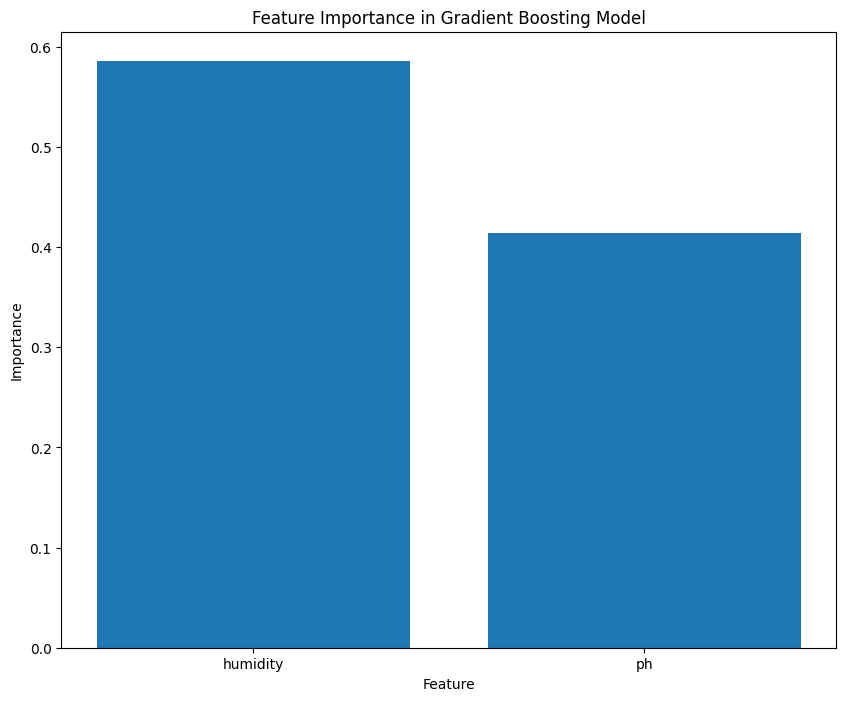

In [34]:
# Assuming your trained model is named 'gbr'
feature_importances = gbr.feature_importances_

# Print feature importances or create a bar chart for visualization
print("Feature Importances:", feature_importances)

# Example bar chart using matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.bar(X.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the MLPRegressor
mlp_regressor = MLPRegressor(random_state=42)
mlp_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3782.469717756937


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 
# Initializing the Decision Tree Regressor model
tree_regressor = DecisionTreeRegressor(random_state=42)

# Fitting the model on the training data
tree_regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = tree_regressor.predict(X_test)

# Calculating Mean Squared Error (MSE) as a performance metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 4896.204545454545


[Text(0.5, 0.9, '200.0 <= 2149.0\nsquared_error = 3018.38\nsamples = 1760\nvalue = 102.655'),
 Text(0.25, 0.7, '49.0 <= 629.5\nsquared_error = 2924.369\nsamples = 1720\nvalue = 100.851'),
 Text(0.125, 0.5, '200.0 <= 1080.5\nsquared_error = 2461.134\nsamples = 484\nvalue = 113.103'),
 Text(0.0625, 0.3, '49.0 <= 16.5\nsquared_error = 1351.804\nsamples = 281\nvalue = 103.569'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, '49.0 <= 119.0\nsquared_error = 3696.723\nsamples = 203\nvalue = 126.3'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, '49.0 <= 2131.5\nsquared_error = 3023.963\nsamples = 1236\nvalue = 96.053'),
 Text(0.3125, 0.3, '49.0 <= 1657.5\nsquared_error = 3107.693\nsamples = 1177\nvalue = 97.6'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, '200.0 <= 1427.0\nsquared_error = 354.196\nsamples = 59\nvalue = 65.203'),
 Text(0.40625, 0.1

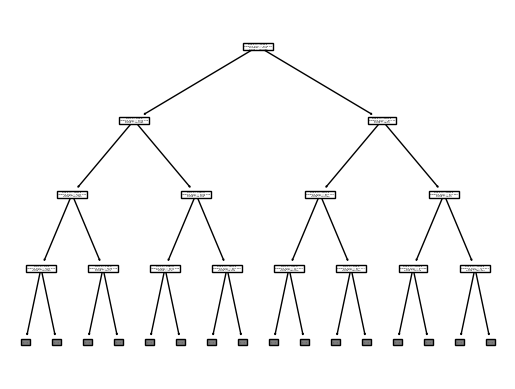

In [37]:
from sklearn.tree import plot_tree

# Assuming your model is named 'tree_regressor' and feature names are in 'feature_names' list
plot_tree(tree_regressor, max_depth=3, feature_names=y_pred)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load your data: Replace 'X' and 'y' with your actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Random Forest Classifier model
clf = RandomForestClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.015909090909090907


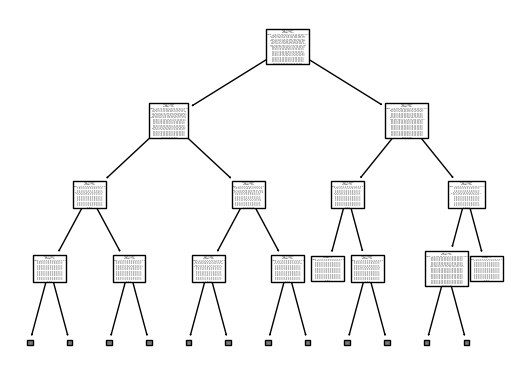

In [39]:
from sklearn.tree import plot_tree

# Assuming your trained model is named 'clf' and feature names are in 'feature_names' list
for tree in clf.estimators_:
    plot_tree(tree, max_depth=3, feature_names=y_pred)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your data: Replace 'X' and 'y' with your actual feature and target variables
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




Mean Squared Error: 2853.6220475


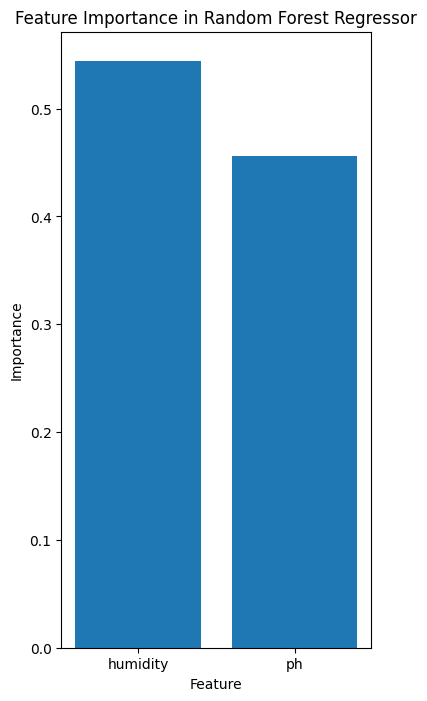

In [41]:
# Feature Importance Visualization (similar to Random Forest Classifier)
feature_importances = rf_regressor.feature_importances_
plt.figure(figsize=(4, 8))
plt.bar(x.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Regressor')
plt.show()

# Partial Dependence Plots (for understanding individual feature effect on prediction)
from sklearn.inspection import partial_dependence



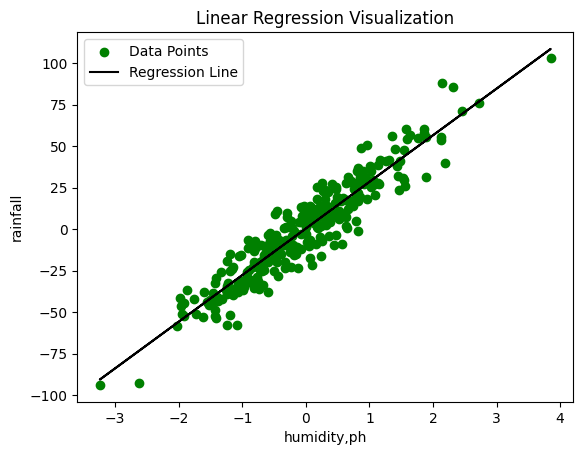

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate random linear data
X, Y = make_regression(n_samples=300, n_features=1, noise=10, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Plot data points
plt.scatter(X, Y, color='green', label='Data Points')

# Plot the regression line
plt.plot(X, model.predict(X), color='black', label='Regression Line')

# Add labels and title
plt.xlabel('humidity,ph')
plt.ylabel('rainfall')
plt.title('Linear Regression Visualization')

# Add legend
plt.legend()

# Show plot
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


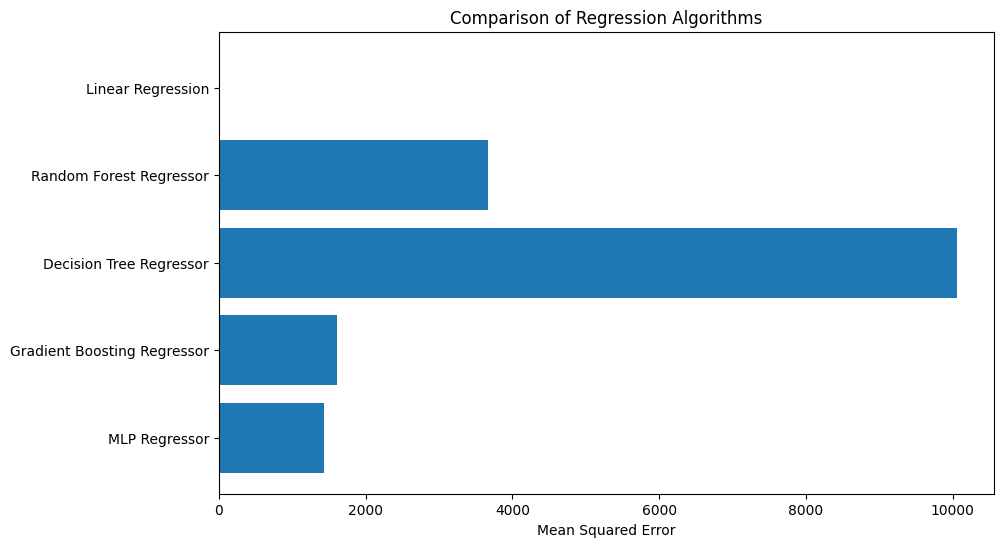

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=25),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=25),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=25),
    "MLP Regressor": MLPRegressor(random_state=25)
}

# Train and evaluate each model
mse_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[name] = mse

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(mse_scores)), list(mse_scores.values()), align='center')
plt.yticks(range(len(mse_scores)), list(mse_scores.keys()))
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Regression Algorithms')
plt.gca().invert_yaxis()  # Invert y-axis to have the best model on top
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Discretize the target variable into bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_bins = est.fit_transform(y.reshape(-1, 1)).flatten()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y_bins, test_size=0.2, random_state=25)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Convert predictions to discrete values
y_pred_discrete = est.transform(y_pred.reshape(-1, 1)).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_discrete)
f1 = f1_score(y_test, y_pred_discrete, average='weighted')
recall = recall_score(y_test, y_pred_discrete, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.45
F1 Score: 0.2793103448275862
Recall: 0.45


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=25)

# Train the model
rf_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = rf_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 3670.2432313738996
Mean Absolute Error: 48.88158509123032
R-squared: 0.850563349796046


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Discretize the target variable into bins
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
y_bins = est.fit_transform(y.reshape(-1, 1)).flatten()

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y_bins, test_size=0.2, random_state=25)

# Initialize and train Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=25)
dt_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = dt_regressor.predict(X_test)

# Convert predictions to discrete values
y_pred_discrete = est.transform(y_pred.reshape(-1, 1)).flatten()

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_discrete)
f1 = f1_score(y_test, y_pred_discrete, average='weighted')
recall = recall_score(y_test, y_pred_discrete, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)


Accuracy: 0.45
F1 Score: 0.2793103448275862
Recall: 0.45


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Initialize MLP Regressor
mlp_regressor = MLPRegressor(random_state=25)

# Train the model
mlp_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = mlp_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 1428.0989963188829
Mean Absolute Error: 28.460627849899208
R-squared: 0.941853899941766


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate synthetic dataset
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=25)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=25)

# Train the model
gb_regressor.fit(X_train, y_train)

# Predict on test set
y_pred = gb_regressor.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 1607.0136396311793
Mean Absolute Error: 32.0941058770988
R-squared: 0.9345692587658142
